# IMDb Sentiment Classification Task

This data set is pulled from the **Large Movie Review Dataset** available at [Stanford Artificial Intelligence Laboratory](http://ai.stanford.edu/~amaas/data/sentiment/)

It contains a set of 25,000 movie reviews for training, and 25,000 for testing. 

There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided.

### Model Architecture

#### LSTM + RNN
To counteract the vanishing gradient problem of conventional Recurrent Neural Networks, we will employ a Long Short-Term Memory (LSTM) Network.

![Model Architecture](Figures/Other/model_architecture.png)

- **Input**: English-sentence movie reviews from IMDb
- **Word Embedding Layer**: Learned Vector Representation of the Input Words
- **LSTM Layer**: Classify the vector representations from the word embedding layer as positive or negative
- **Dense Layer**: Transforms the LSTM output into a fully connected input to the sigmoid function, so that the final output is between 0 and 1.
- **Output**: A probability between 0 and 1, representing the probability that the movie review is negative or positive, respectively. 

### Code

In [1]:
%matplotlib inline

In [21]:
# Dataset
from keras.datasets import imdb
from keras.preprocessing import sequence
# Models
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
# Plotting
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Miscellaneous
import warnings
warnings.filterwarnings('ignore')

### Data Preparation

#### Importing Data and creating test/train split

In [3]:
training_set, testing_set = imdb.load_data(num_words = 10000)

In [4]:
X_train, y_train = training_set
X_test, y_test = testing_set

In [5]:
print("Number of training samples = {}".format(X_train.shape[0]))
print("Number of testing samples = {}".format(X_test.shape[0]))

Number of training samples = 25000
Number of testing samples = 25000


#### Zero padding

In [6]:
X_train_padded = sequence.pad_sequences(X_train, maxlen= 100)
X_test_padded = sequence.pad_sequences(X_test, maxlen= 100)

In [7]:
print("X_train vector shape = {}".format(X_train_padded.shape))
print("X_test vector shape = {}".format(X_test_padded.shape))

X_train vector shape = (25000, 100)
X_test vector shape = (25000, 100)


### Data Exploration
#### Word de-tokenization

In [9]:
word_to_id = imdb.get_word_index()
word_dict = {key:(value + 3)
             for key, value in word_to_id.items()}
word_dict["<PAD>"] = 0
word_dict["<START>"] = 1
id_to_word = {value:key
              for key, value in word_dict.items()}

#### Example Reviews
##### Negative Sentiment

In [10]:
# print(" ".join(id_to_word[id]
#                for id in X_train[159]))
# assert y_train[159] == 0 # Should have a negative sentiment

<START> a rating of 1 does not begin to express how dull depressing and relentlessly bad this movie is


##### Positive Sentiment

In [ ]:
# print(" ".join(id_to_word[id]
#                for id in X_train[6]))
# assert y_train[6] == 1 # Should have a positive sentiment

## Model Definition

In [8]:
model = Sequential()

### Word Embedding Layer

In [ ]:
model.add(Embedding(input_dim = 10000,
                    output_dim = 128))

### LSTM Layer

In [10]:
model.add(LSTM(units = 128))

### Dense Layer

In [11]:
model.add(Dense(units = 1,
                activation = 'sigmoid'))

### Model Summary

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


## Training Models

In [13]:
def train_wordembed_lstm_dense_model(Optimizer, X_train, y_train, X_val, y_val):
    """ 
    Takes as input an optimizer function, 
    returns the fit score and model
    """
    # INITIALIZE MODEL
    model = Sequential()
    
    # ADD LAYERS
    # Word Embedding Layer
    model.add(Embedding(input_dim = 10000, 
                        output_dim = 128))
    # LSTM Layer
    model.add(LSTM(units=128))
    # Dense Layer
    model.add(Dense(units=1, 
                    activation='sigmoid'))
    
    # COMPILE MODEL
    model.compile(loss='binary_crossentropy', 
                  optimizer = Optimizer, 
                  metrics=['accuracy'])
    
    # TRAIN MODEL
    scores = model.fit(X_train, 
                       y_train, 
                       batch_size=128, 
                       epochs=10, 
                       validation_data=(X_val, y_val), 
                       verbose=0)
    
    return scores, model

#### RMSprop Optimizer

In [15]:
RMSprop_score, RMSprop_model = train_wordembed_lstm_dense_model(
                                           Optimizer = 'RMSprop',
                                           X_train = X_train_padded,
                                           y_train = y_train,
                                           X_val = X_test_padded,
                                           y_val = y_test)

### Plot Accuracy per Epoch

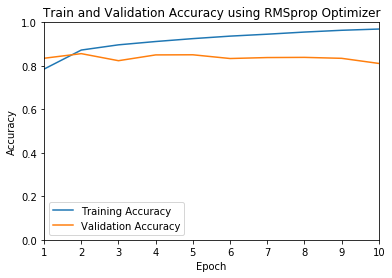

In [16]:
plt.plot(range(1,11), 
         RMSprop_score.history['acc'], 
         label='Training Accuracy')

plt.plot(range(1,11), 
         RMSprop_score.history['val_acc'], 
         label='Validation Accuracy')

plt.axis([1, 10, 0, 1])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using RMSprop Optimizer')

plt.legend()

plt.show()

### Confusion Matrix

Text(56.406249999999986, 0.5, 'Actual')

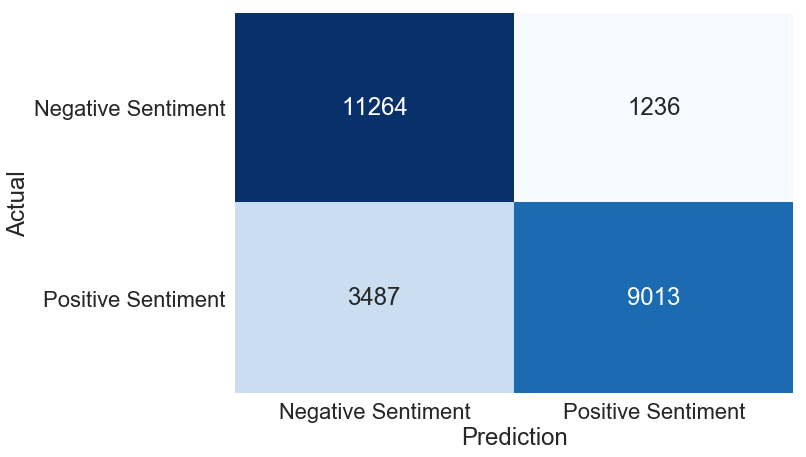

In [19]:
plt.figure(figsize=(10,7))

sns.set(font_scale=2)

y_test_pred = RMSprop_model.predict_classes(X_test_padded)
c_matrix = confusion_matrix(y_test, y_test_pred)

ax = sns.heatmap(c_matrix, 
                 annot=True, 
                 xticklabels=['Negative Sentiment', 'Positive Sentiment'], 
                 yticklabels=['Negative Sentiment', 'Positive Sentiment'], 
                 cbar=False, 
                 cmap='Blues', 
                 fmt='g')

ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")